############################################################################################
################## -- Programa de Especialización en Data Science Nivel I --##########################
############################################################################################

Modelos Clasificación : Modelos de Series de Tiempo.  
Autores : José Cárdenas - André Chávez 

In [2]:
#######################################################################
################ Modelos de Series de Tiempo ##########################
#######################################################################

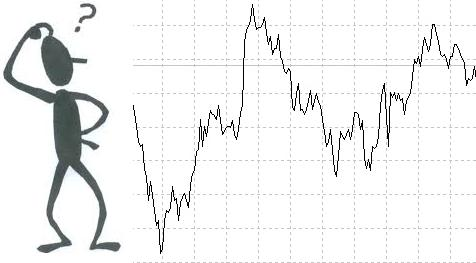

In [2]:
#Importar las librerías necesarias en Python.
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [3]:
# Cargamos la información con los datos
# La data son meses, además del número de pasajeros que viajan por mes.
data = pd.read_csv('C:/Users/Administrador/Downloads/AirPassengers.csv')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


In [4]:
# Dividimos nuestros datos en t y Zt, es decir en tiempo y la variable a analizar.
# parse_dates, es la columna con la inf del datatime, index_col, pandas reconoce a ésta columna como el ID, 
# date_parser, es la función de conversión de acuerdo al formato que uno tenga.
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('C:/Users/Administrador/Downloads/AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
data.head()


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
# Verificamos que los indices ahora sean las fechas
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
# Creamos la serie de tiempo , como ejemplo con los primeros 10 registros
ts=data['#Passengers'].head(10)

In [7]:
# Podemos mostrar cualquier elemento de la serie de tiempo con el índice
ts['1949-01-01']


112

In [8]:
# También lo podemos hacer con la librería datatime
from datetime import datetime
ts[datetime(1949,1,1)]

112

In [9]:
# Podemos especificar un rango de valores de la serie de tiempo
ts['1949-01-01':'1949-05-01']


Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [10]:
# Podemos especificar un rango de valores de la serie de tiempo
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [11]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [16]:
#######################################
#### Análisis de Series de Tiempo #####
#######################################


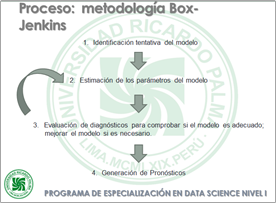

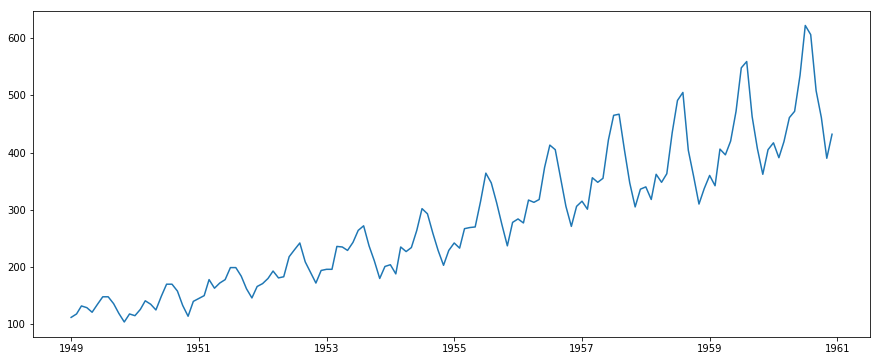

In [12]:
# Graficamos la serie de tiempo
ts=data['#Passengers']
plt.plot(ts)

In [13]:
# Podemos realizar el test de Dickey-Fuller para observar la presencia de estacionariedad
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # Determinando los promedios móviles o medias móviles
    rolmean = pd.rolling_mean(timeseries, window=12)

    # Dibujamos la serie original y la serie suavizada
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Evaluamos el test de Dickey - Fuller
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  


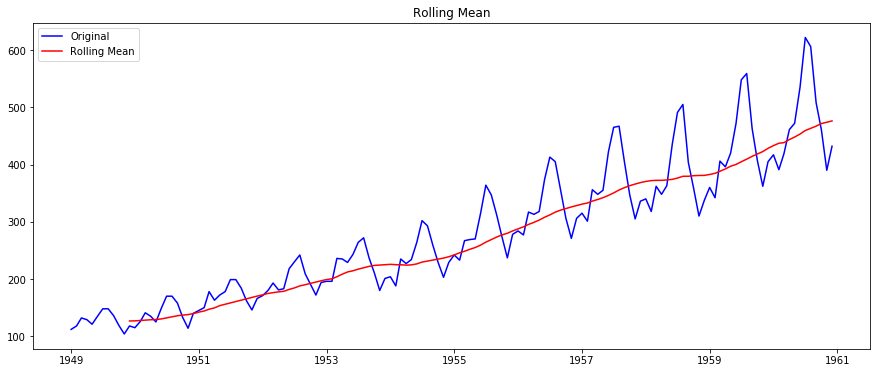

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [14]:
# Evaluamos el test con la función creada
test_stationarity(ts)
# Evaluamos las Hipótesis :
# H0: La serie de tiempo no es estacionaria
# H0: La serie de tiempo es estacionaria

In [ ]:
# Comentarios !!!!!

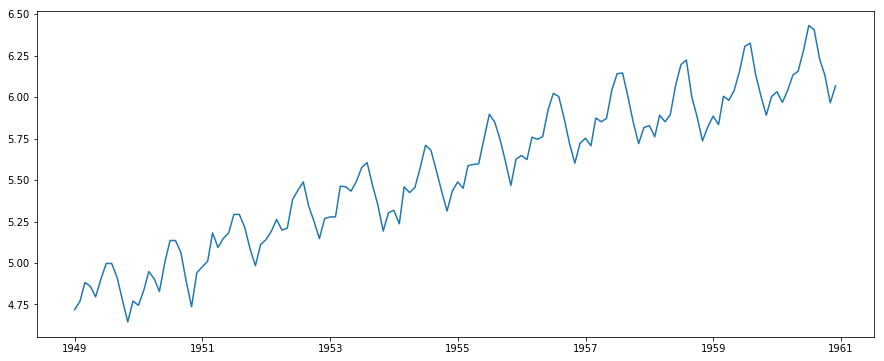

In [15]:
#Debido a que la serie no es estacionaria podemos intentar volverla estacionaria, para ésto debemos de tener una estabilidad
# en nivel y en variabilidad
# Primero veremos la variabilidad de la serie de tiempo
ts_log = np.log(ts)
plt.plot(ts_log)

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


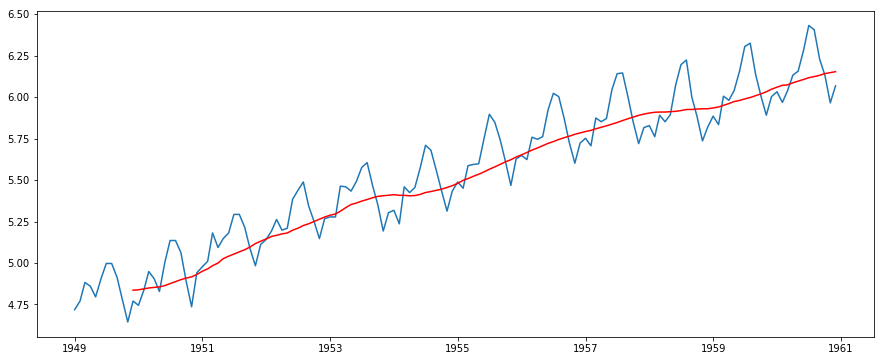

In [16]:
# A la serie sin variabilidad o estable en variabilidad , ahora lo que haremos es volverla estable en nivel, 
# ésto lo podemos hacer con diferencias sobre la serie.
moving_avg = pd.rolling_mean(ts_log,12) # Calculamos el promedio móvil de orden o ventana 12
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [17]:
# Una manera de volverla estable en nivel es restar la serie en el tiempo t menos la serie en el tiempo t-1,
# otra manera es a la serie que es estable en variabilidad , restarle sus medias o promedios móviles.
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

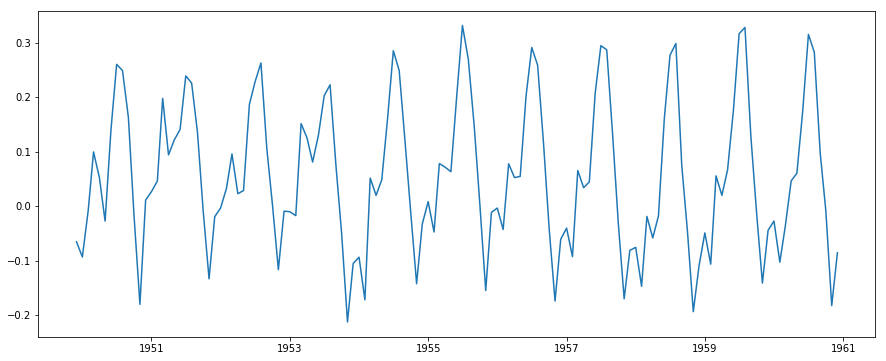

In [18]:
# Podemos hacer un gráfico de la serie y observar si es estable en nivel y en variabilidad, si cumple los 2 podríamos estar
# bajo una serie de tiempo estacionaria.
plt.plot(ts_log_moving_avg_diff)

In [19]:
# Le quitamos los registros nulos y los guardamos en la misma variable.
ts_log_moving_avg_diff.dropna(inplace=True)


C:\Users\Andre Chavez\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  


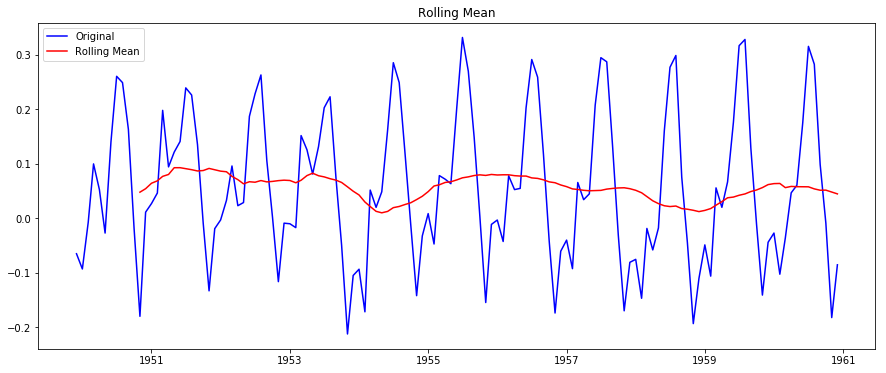

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [21]:
# Una vez que estabilizamos el nivel y la variabilidad, aplicamos de nuevo el test
test_stationarity(ts_log_moving_avg_diff)

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  


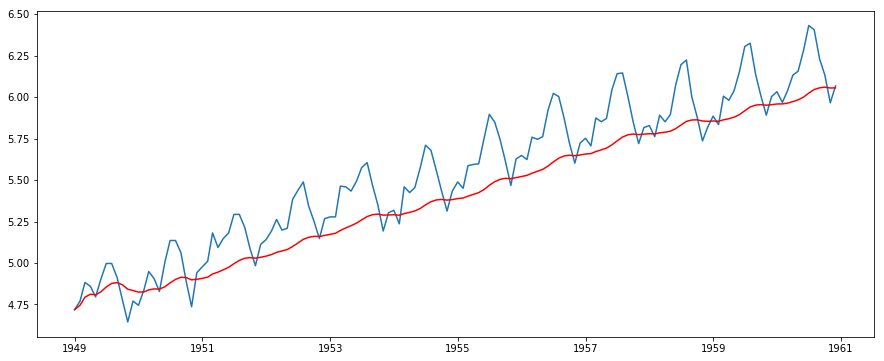

In [22]:
# Así como usamos el método de medias móviles , podríamos usar también el método de suavización exponencial simple
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

In [23]:
# Diferenciamos la serie estable en variabilidad para estabilizarla en nivel
ts_log_ewma_diff = ts_log - expwighted_avg


C:\Users\Andre Chavez\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  


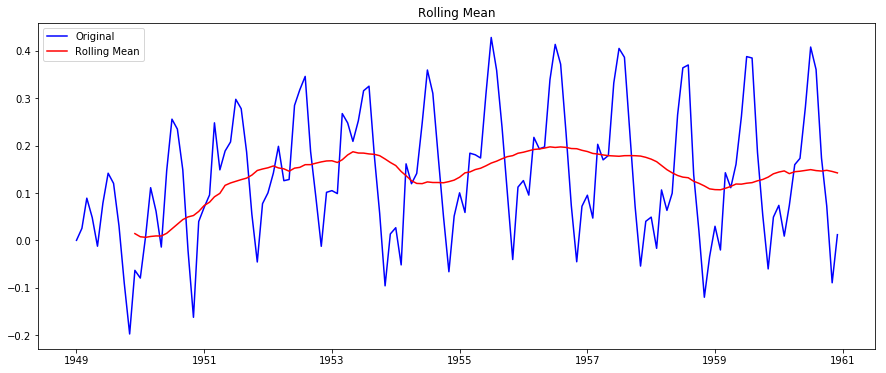

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [24]:
# Una vez que estabilizamos el nivel y la variabilidad, aplicamos de nuevo el test
test_stationarity(ts_log_ewma_diff)

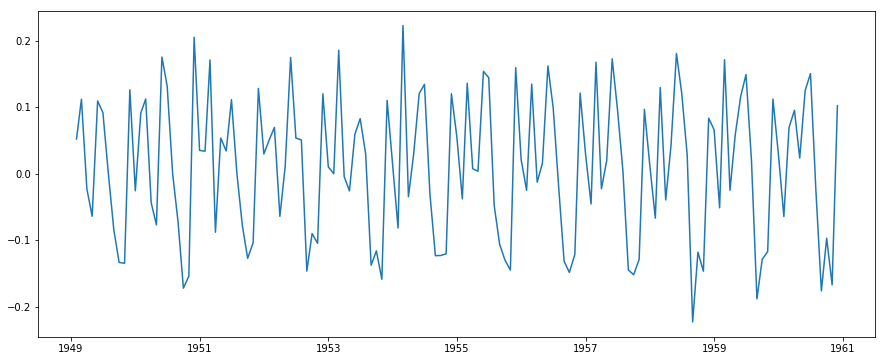

In [25]:
# Ahora revisamos la manera original de estabilizar una serie de tiempo en nivel, es decir
# Zt = Xt - Xt-1
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  


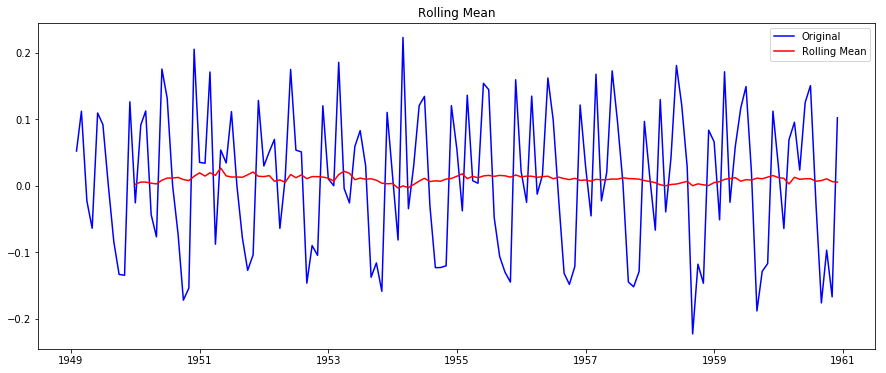

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [26]:
# Le quitamos los valores nulos y le aplicamos el test de estacionariedad
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [30]:
# Como nuestra serie de tiempo es estacionaria, ahora hay que estimar el modelo a ajustar y realizar las estimaciones
# Gráfico de los ACF y ACFP (ACF : Autocorrelaciones simples)
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.api as smt

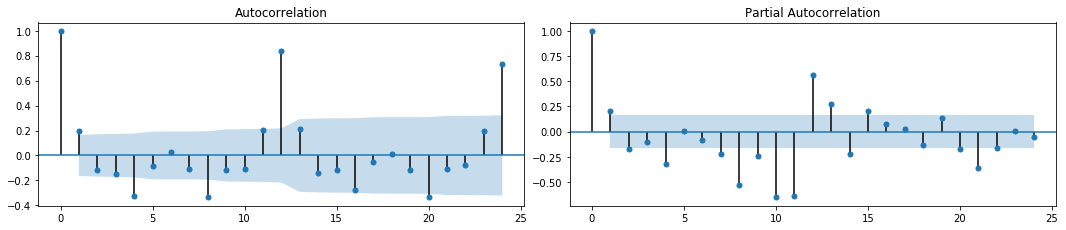

In [42]:
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))
smt.graphics.plot_acf(ts_log_diff, lags=24, ax=acf_ax)
smt.graphics.plot_pacf(ts_log_diff, lags=24, ax=pacf_ax)
plt.tight_layout()

In [60]:
# Debido a que gracias a las ACF y ACFP hemos visto que tipo de modelo se puede ajustar, ahora especificamos un tipo de modelo.
from statsmodels.tsa.arima_model import ARIMA

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\statsmodels-0.10.0-py3.6-win-amd64.egg\statsmodels\tsa\base\tsa_model.py:164: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Andre Chavez\Anaconda3\lib\site-packages\statsmodels-0.10.0-py3.6-win-amd64.egg\statsmodels\tsa\base\tsa_model.py:164: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.5023')

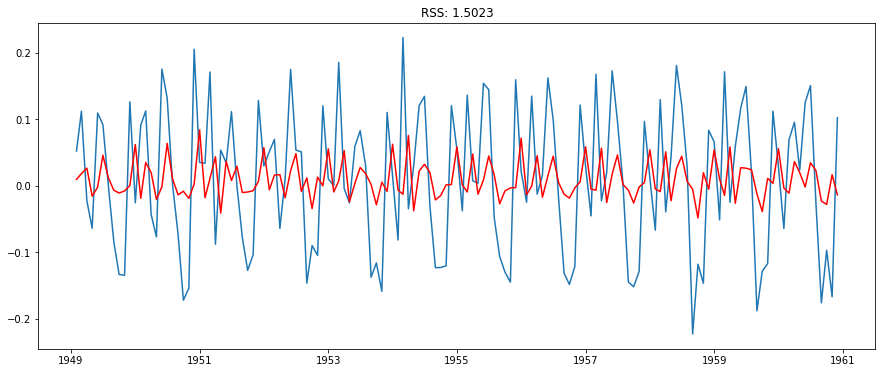

In [61]:
# Podemos espeficicar un modelo y ver la suma de cuadrados de errores
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff) # Graficamos la serie original
plt.plot(results_AR.fittedvalues, color='red') # Graficamos la serie ajustada
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2)) # Graficamos los residuos

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\statsmodels-0.10.0-py3.6-win-amd64.egg\statsmodels\tsa\base\tsa_model.py:164: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Andre Chavez\Anaconda3\lib\site-packages\statsmodels-0.10.0-py3.6-win-amd64.egg\statsmodels\tsa\base\tsa_model.py:164: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.4721')

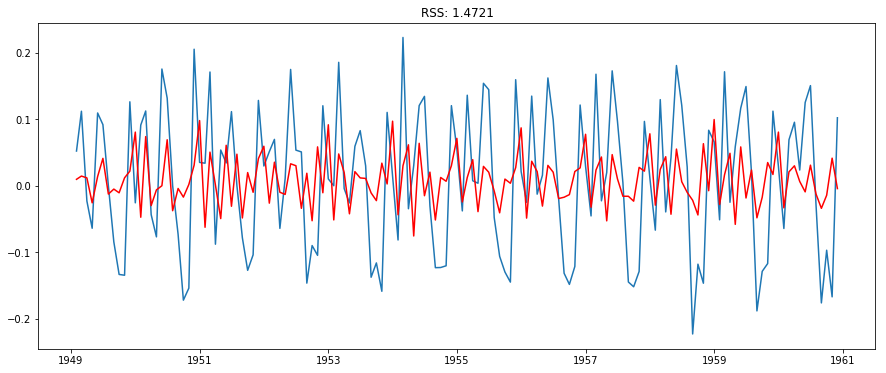

In [62]:
# Podemos espeficicar otro modelo y ver la suma de cuadrados de errores
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\statsmodels-0.10.0-py3.6-win-amd64.egg\statsmodels\tsa\base\tsa_model.py:164: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Andre Chavez\Anaconda3\lib\site-packages\statsmodels-0.10.0-py3.6-win-amd64.egg\statsmodels\tsa\base\tsa_model.py:164: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.0292')

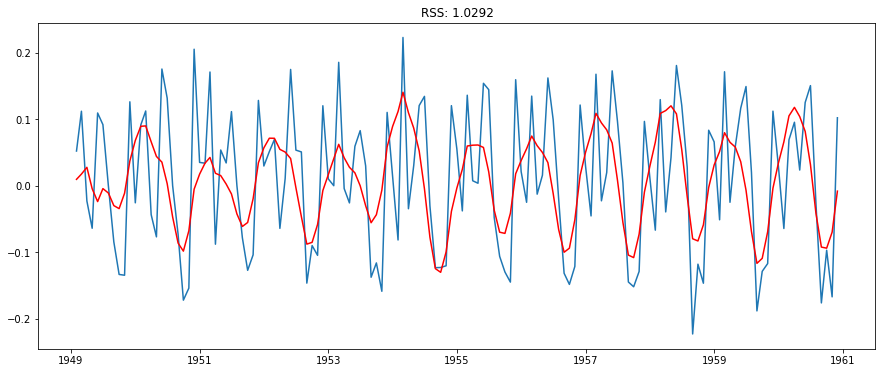

In [63]:
# Podemos espeficicar otro modelo y ver la suma de cuadrados de errores
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [64]:
# Como ya elegimos nuestro modelo final, ahora hallamos las predicciones
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [65]:
# Debido a que el modelo final es un modelo con diferencias y transformado, debemos llevarlo a sus valores originales
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [66]:
# Ponemos nuestra serie de tiempo en el formato para llevarlo a la función inversa que es el exponente
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5,1,'RMSE: 90.1047')

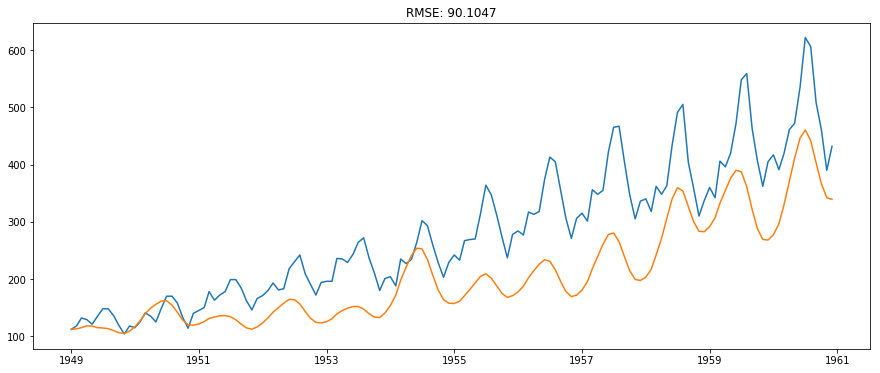

In [67]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [ ]:
########################################################
## Enfoque de Descomposición de la Serie de Tiempo #####
########################################################

In [5]:
# Graficamos la serie de tiempo
ts=data['#Passengers']

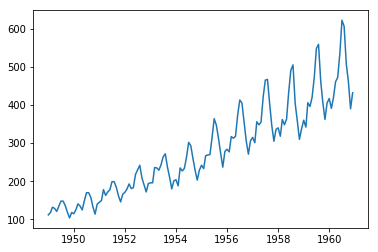

In [6]:
plt.plot(ts)

In [10]:
#aplico la descomposicion 
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,model='multiplicative',two_sided = False)
#pueden ser de tipo aditivos o multiuplicativos: 
#aditivo, las componentes no son tan marcadas
#multiplicativo: las ocmponentes son muy marcadas.

In [15]:
#decomposition.seasonal    los 3 parametros que nos importan son seaseonal, trend y rsid (random)

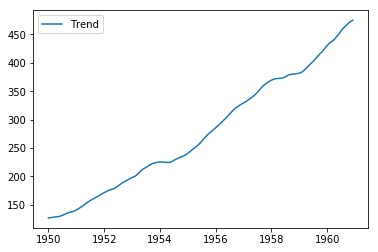

In [11]:
# Observamos la tendencia de la serie de tiempo
trend = decomposition.trend
plt.plot(trend, label='Trend')
plt.legend(loc='best')

In [12]:
# Observamos la estacionalidad de la serie de tiempo o también llamado los coeficientes estacionales
seasonal = decomposition.seasonal

In [13]:
# Observamos los residuales
residual = decomposition.resid

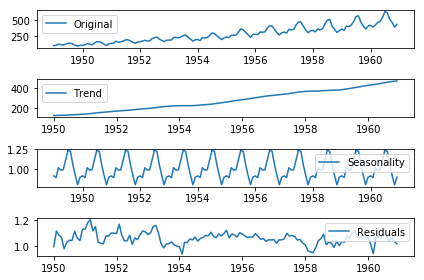

In [15]:
# Podemos observar el gráfico junto , es decir los componentes de la serie de tiempo
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [16]:
#estimamos la tendencia
tendencia=pd.DataFrame(trend)
estacionalidad=pd.DataFrame(seasonal)

In [25]:
#tendencia.head(20)

In [17]:
#me quedo sin registros nulos (he perdido registros inicio/fin por usar promesdios moviles)
tend=tendencia.iloc[12:144]
est=estacionalidad.iloc[12:144]

In [18]:
#contrsuyo la estimacion d ela tendencia
X=list(range(1,133))
X2=pd.DataFrame(X)

In [19]:
# Al dataset o set de entrenamiento le retiramos la variable dependiente o target
X=X2
y=tend

In [20]:
# Cargamos el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [21]:
# Entrenamiento
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
Tend_Est=pd.DataFrame(lm.predict(X) )

In [34]:
# Estimación de la serie de tiempo

In [23]:
est.values

array([[0.90836989],
       [0.88610984],
       [1.01313988],
       [0.98183989],
       [0.98593227],
       [1.11482447],
       [1.2368684 ],
       [1.22141011],
       [1.05040891],
       [0.91527208],
       [0.79415833],
       [0.89166594],
       [0.90836989],
       [0.88610984],
       [1.01313988],
       [0.98183989],
       [0.98593227],
       [1.11482447],
       [1.2368684 ],
       [1.22141011],
       [1.05040891],
       [0.91527208],
       [0.79415833],
       [0.89166594],
       [0.90836989],
       [0.88610984],
       [1.01313988],
       [0.98183989],
       [0.98593227],
       [1.11482447],
       [1.2368684 ],
       [1.22141011],
       [1.05040891],
       [0.91527208],
       [0.79415833],
       [0.89166594],
       [0.90836989],
       [0.88610984],
       [1.01313988],
       [0.98183989],
       [0.98593227],
       [1.11482447],
       [1.2368684 ],
       [1.22141011],
       [1.05040891],
       [0.91527208],
       [0.79415833],
       [0.891

In [24]:
# Mi serie final es el producto o resultado , de estudiar la tendencia y estacionalidad 
# por separado.
Estimado=Tend_Est.values * est.values

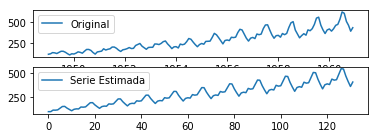

In [25]:
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(Estimado, label='Serie Estimada')
plt.legend(loc='best')